In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import re
import sklearn
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib as matplot
%matplotlib inline

In [ ]:
from pandas import read_csv
train=read_csv("/content/KDDTrain+.csv")
test=read_csv("/content/KDDTest+.csv")

In [ ]:
train.head()

,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.columns

Index([''duration'', ''protocol_type'', ''service'', ''flag'', ''src_bytes'',
       ''dst_bytes'', ''land'', ''wrong_fragment'', ''urgent'', ''hot'',
       ''num_failed_logins'', ''logged_in'', ''num_compromised'',
       ''root_shell'', ''su_attempted'', ''num_root'', ''num_file_creations'',
       ''num_shells'', ''num_access_files'', ''num_outbound_cmds'',
       ''is_host_login'', ''is_guest_login'', ''count'', ''srv_count'',
       ''serror_rate'', ''srv_serror_rate'', ''rerror_rate'',
       ''srv_rerror_rate'', ''same_srv_rate'', ''diff_srv_rate'',
       ''srv_diff_host_rate'', ''dst_host_count'', ''dst_host_srv_count'',
       ''dst_host_same_srv_rate'', ''dst_host_diff_srv_rate'',
       ''dst_host_same_src_port_rate'', ''dst_host_srv_diff_host_rate'',
       ''dst_host_serror_rate'', ''dst_host_srv_serror_rate'',
       ''dst_host_rerror_rate'', ''dst_host_srv_rerror_rate'', ''class''],
      dtype='object')

In [ ]:
test.columns=train.columns

In [ ]:
test.head()

,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,0,tcp,private,REJ,0,0,0,0,0,0,...,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
1,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,anomaly
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,anomaly
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,anomaly


In [ ]:
train["'class'"].value_counts()

normal     33453
anomaly    29546
Name: 'class', dtype: int64

In [ ]:
train.shape
test.shape

(22544, 42)

In [ ]:
labels = ["duration","protocol_type","service","flag","src_bytes",
          "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate",'class']
print(len(labels))
combined_data = pd.concat([train, test])
combined_data.shape
combined_data.head(5)

41


,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train.head()

,'duration','protocol_type','service','flag','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot',...,'dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate','class'
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25.0,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1.0,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26.0,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255.0,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train["'service'"].value_counts()

http         19991
private      11062
domain_u      4497
smtp          3648
ftp_data      3450
             ...  
pm_dump          3
http_8001        1
aol              1
http_2784        1
tftp_u           1
Name: 'service', Length: 69, dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 42 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   'duration'                     63000 non-null  int64  
 1   'protocol_type'                63000 non-null  object 
 2   'service'                      63000 non-null  object 
 3   'flag'                         63000 non-null  object 
 4   'src_bytes'                    63000 non-null  int64  
 5   'dst_bytes'                    63000 non-null  int64  
 6   'land'                         63000 non-null  int64  
 7   'wrong_fragment'               63000 non-null  int64  
 8   'urgent'                       63000 non-null  int64  
 9   'hot'                          63000 non-null  int64  
 10  'num_failed_logins'            63000 non-null  int64  
 11  'logged_in'                    63000 non-null  int64  
 12  'num_compromised'              63000 non-null 

In [ ]:
#combined_data.drop(["'class'"],axis=1,inplace=True)

In [ ]:
labels = ["duration","protocol_type","service","flag","src_bytes",
          "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","class"]
print(len(labels))

41


In [ ]:
combined_data.isnull().sum()

'duration'                       0
'protocol_type'                  0
'service'                        0
'flag'                           0
'src_bytes'                      0
'dst_bytes'                      0
'land'                           0
'wrong_fragment'                 0
'urgent'                         0
'hot'                            0
'num_failed_logins'              0
'logged_in'                      0
'num_compromised'                0
'root_shell'                     0
'su_attempted'                   0
'num_root'                       0
'num_file_creations'             0
'num_shells'                     0
'num_access_files'               0
'num_outbound_cmds'              0
'is_host_login'                  0
'is_guest_login'                 0
'count'                          1
'srv_count'                      1
'serror_rate'                    1
'srv_serror_rate'                1
'rerror_rate'                    1
'srv_rerror_rate'                1
'same_srv_rate'     

In [ ]:
combined_data.dropna(inplace = True)

<Axes: xlabel='protocol_type', ylabel='occurances'>

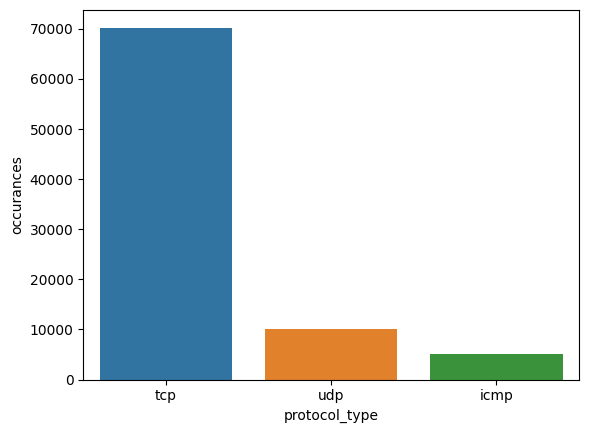

In [ ]:
temp = combined_data["'protocol_type'"].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['protocol_type', 'occurances'])
sns.barplot(data=d, x='protocol_type', y='occurances')

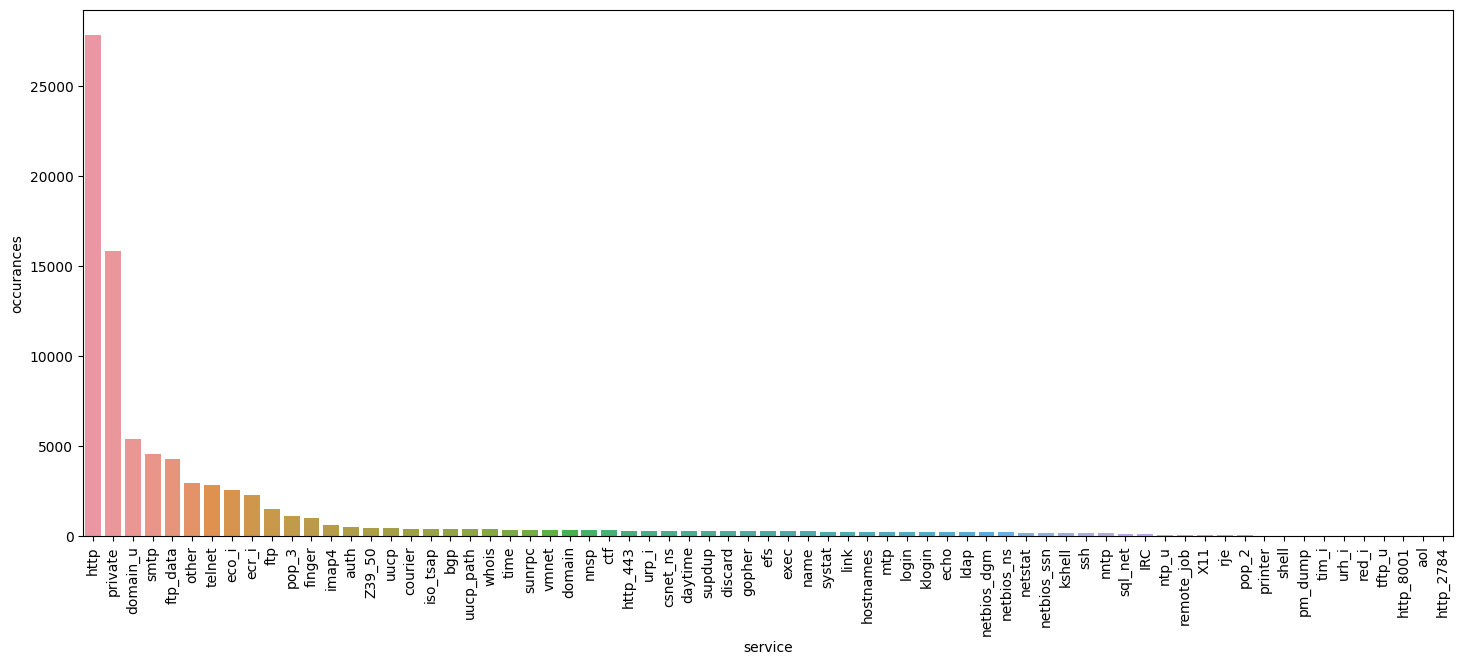

In [ ]:
temp = combined_data["'service'"].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['service', 'occurances'])
fig, ax = plt.subplots(figsize=(15, 6))
sns.barplot(data=d, x='service', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

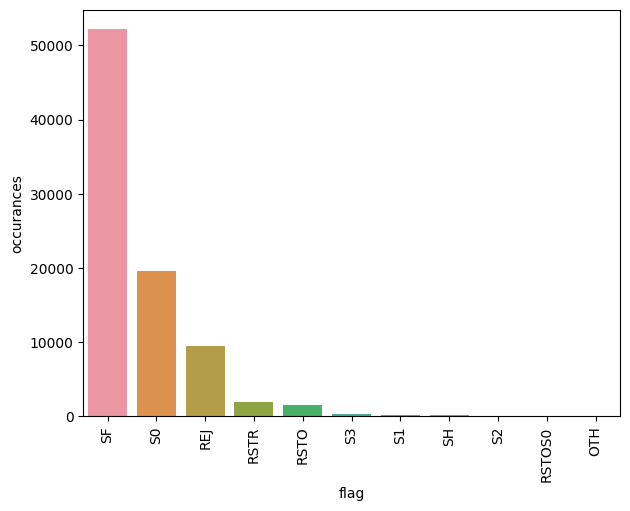

In [ ]:
# categorical feature 'flag'
temp = combined_data["'flag'"].value_counts()
a = temp.index
b = temp.values
zipped = list(zip(a, b))
d = pd.DataFrame(zipped, columns=['flag', 'occurances'])
fig, ax = plt.subplots()
sns.barplot(data=d, x='flag', y='occurances')
fig.tight_layout()
plt.xticks(rotation=90)
plt.show()

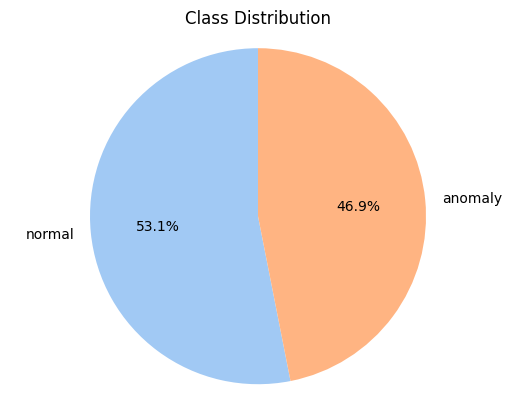

In [ ]:
temp = train["'class'"].value_counts()
labels = temp.index
sizes = temp.values

# Plotting a pie chart
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Class Distribution')

plt.show()


In [ ]:
combined_data.describe()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
count,85543.000000,8.554300e+04,8.554300e+04,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,...,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000,85543.000000
mean,272.752534,4.276382e+04,1.817232e+04,0.000187,0.018447,0.000234,0.173468,0.006535,0.406451,0.263575,...,185.378546,121.822300,0.543070,0.085033,0.144433,0.029296,0.236496,0.232547,0.149355,0.148523
std,2370.075944,5.278421e+06,4.479278e+06,0.013675,0.227232,0.021623,1.879401,0.086182,0.491173,27.178810,...,97.960760,111.495133,0.447371,0.197691,0.309135,0.106787,0.415619,0.417193,0.333922,0.346086
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,90.000000,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,81.000000,0.650000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.805000e+02,5.930000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.050000,0.010000,0.140000,0.020000,0.000000,0.000000
max,57715.000000,1.167519e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,4.000000,1.000000,7479.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
combined_data.drop("'num_outbound_cmds'",axis = 1).corr()

,'duration','src_bytes','dst_bytes','land','wrong_fragment','urgent','hot','num_failed_logins','logged_in','num_compromised',...,'dst_host_count','dst_host_srv_count','dst_host_same_srv_rate','dst_host_diff_srv_rate','dst_host_same_src_port_rate','dst_host_srv_diff_host_rate','dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate','dst_host_srv_rerror_rate'
'duration',1.000000,0.072613,0.015693,-0.001574,-0.009343,0.001206,0.000231,-0.004007,-0.063666,0.037649,...,0.050648,-0.089179,-0.096073,0.203870,0.181172,-0.024648,-0.045176,-0.042866,0.127397,0.141171
'src_bytes',0.072613,1.000000,-0.000011,-0.000111,-0.000655,-0.000083,0.000739,-0.000612,-0.004348,-0.000073,...,-0.005375,-0.007845,-0.007692,0.000428,0.000622,-0.001560,-0.003904,-0.001989,-0.002179,0.010748
'dst_bytes',0.015693,-0.000011,1.000000,-0.000055,-0.000329,0.000165,-0.000255,0.000105,-0.002464,0.000832,...,0.001949,-0.003642,-0.003805,0.009558,0.009716,-0.000987,-0.002209,-0.002148,0.008465,0.008162
'land',-0.001574,-0.000111,-0.000055,1.000000,-0.001110,-0.000148,-0.001262,-0.001037,-0.011318,-0.000133,...,-0.020831,-0.014431,0.004779,-0.003505,0.024526,0.062371,0.017351,0.015715,-0.005887,-0.005870
'wrong_fragment',-0.009343,-0.000655,-0.000329,-0.001110,1.000000,-0.000878,-0.007493,-0.006156,-0.067179,-0.000787,...,0.024611,-0.047012,-0.044129,0.042982,0.040935,-0.004841,-0.040646,-0.045251,0.011684,-0.034839
'urgent',0.001206,-0.000083,0.000165,-0.000148,-0.000878,1.000000,0.013385,0.036819,0.013066,0.009622,...,-0.013226,-0.009598,-0.004086,0.004729,-0.000050,0.002603,-0.005489,-0.006001,-0.003930,0.000093
'hot',0.000231,0.000739,-0.000255,-0.001262,-0.007493,0.013385,1.000000,-0.000792,0.109994,0.004176,...,-0.007961,-0.047301,-0.034239,-0.008784,-0.031993,-0.020500,-0.049063,-0.050322,-0.031532,-0.035449
'num_failed_logins',-0.004007,-0.000612,0.000105,-0.001037,-0.006156,0.036819,-0.000792,1.000000,-0.054462,0.000927,...,0.018134,-0.000678,0.004128,-0.017911,-0.032777,-0.018681,-0.040114,-0.039336,-0.019547,-0.014547
'logged_in',-0.063666,-0.004348,-0.002464,-0.011318,-0.067179,0.013066,0.109994,-0.054462,1.000000,0.011719,...,-0.373614,0.612894,0.594966,-0.257660,-0.187732,-0.052757,-0.446379,-0.449679,-0.301577,-0.310402
'num_compromised',0.037649,-0.000073,0.000832,-0.000133,-0.000787,0.009622,0.004176,0.000927,0.011719,1.000000,...,-0.011302,-0.008996,-0.004840,0.002388,-0.002264,0.003730,-0.004099,-0.004093,-0.003839,-0.003518


<Axes: >

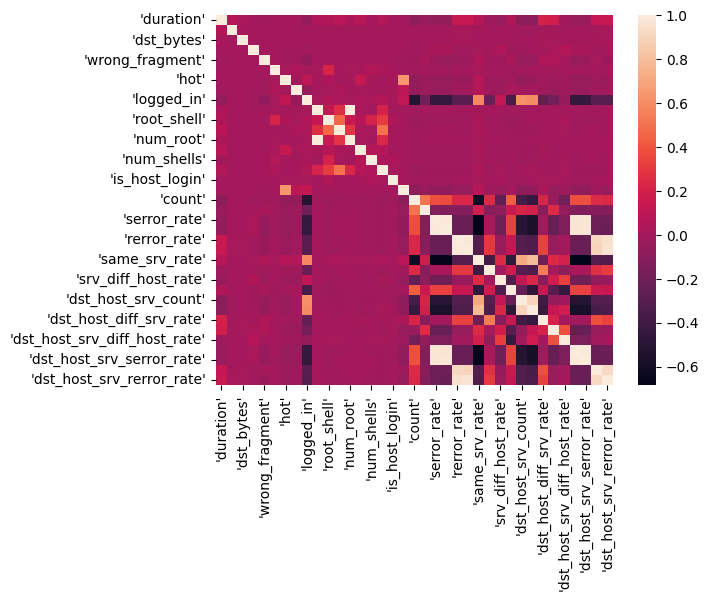

In [ ]:
sns.heatmap(combined_data.drop("'num_outbound_cmds'",axis = 1).corr())

LABEL ENCODING

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
print(set(list(combined_data["'class'"]))) # use print to make it print on single line
combined_data["'class'"] = le.fit_transform(combined_data["'class'"])
combined_data["'protocol_type'"] = le.fit_transform(combined_data["'protocol_type'"])
combined_data["'service'"] = le.fit_transform(combined_data["'service'"])
combined_data["'flag'"] = le.fit_transform(combined_data["'flag'"])
print('\nDescribing attack_type: ')
print("min", combined_data["'class'"].min())
print("max", combined_data["'class'"].max())
print("mean", combined_data["'class'"].mean())
print("mode", combined_data["'class'"].mode())

{0, 1}

Describing attack_type: 
min 0
max 1
mean 0.5045883356908222
mode 0    1
Name: 'class', dtype: int64


FEATURES THAT ARE ELEMINATED BASED ON THE CORRELATION BETWEEN THE VARIABLES AND THE TARGET

In [ ]:
corr_matrix = combined_data.corr().abs().sort_values("'class'")
leastCorrelated = corr_matrix["'class'"].nsmallest(10)
leastCorrelated = list(leastCorrelated.index)
leastSTD =  combined_data.std().to_frame().nsmallest(5, columns=0)
leastSTD = list(leastSTD.transpose().columns)
featureElimination = set(leastCorrelated + leastSTD)
len(featureElimination)
featureElimination

{"'dst_bytes'",
 "'hot'",
 "'is_host_login'",
 "'land'",
 "'num_compromised'",
 "'num_outbound_cmds'",
 "'num_root'",
 "'num_shells'",
 "'root_shell'",
 "'src_bytes'",
 "'urgent'"}

In [ ]:
combined_data.fillna(combined_data.mean(numeric_only=True).round(1), inplace=True)

FINDING THE CATEGORICAL VRAIABLES THAT SHOWS SIGNIFICANCE DIFFERENCE WITH THE TARGET CLASS

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming 'data' is your DataFrame containing the variables mentioned in 'labels'
# Also, assuming 'class' is your target variable

# Subsetting the data with the required columns
subset_data = combined_data[["'protocol_type'", "'service'", "'flag'", "'class'"]]

# Creating contingency tables
contingency_protocol = pd.crosstab(subset_data["'protocol_type'"], subset_data["'class'"])
contingency_service = pd.crosstab(subset_data["'service'"], subset_data["'class'"])
contingency_flag = pd.crosstab(subset_data["'flag'"], subset_data["'class'"])

# Chi-square tests
chi2_protocol, p_protocol, _, _ = chi2_contingency(contingency_protocol)
chi2_service, p_service, _, _ = chi2_contingency(contingency_service)
chi2_flag, p_flag, _, _ = chi2_contingency(contingency_flag)

# Printing the results
print(f"Chi-square test for 'protocol_type': Chi2 = {chi2_protocol}, p-value = {p_protocol}")
print(f"Chi-square test for 'service': Chi2 = {chi2_service}, p-value = {p_service}")
print(f"Chi-square test for 'flag': Chi2 = {chi2_flag}, p-value = {p_flag}")


Chi-square test for 'protocol_type': Chi2 = 6082.02766330787, p-value = 0.0
Chi-square test for 'service': Chi2 = 56965.34253861282, p-value = 0.0
Chi-square test for 'flag': Chi2 = 44093.284069785994, p-value = 0.0


APPLYING PCA TO FIND THE VARIABLES THAT EXPALINS MAXIMUM RATIO OF THE TOTAL NUMERICAL VARIABLES

In [ ]:
#Reduce the features with PCA
from sklearn.decomposition import PCA,TruncatedSVD
from sklearn.preprocessing import StandardScaler
std_slc = StandardScaler()
X_std = std_slc.fit_transform(combined_data.drop(["'protocol_type'", "'service'", "'flag'", "'class'"],axis=1))
pca = sklearn.decomposition.PCA(n_components=15)
X_std_pca = pca.fit_transform(X_std)
print(X_std_pca.shape)
print(X_std_pca)
principal_components = pca.components_
feature_loadings = principal_components.T
principal_components
feature_loadings
feature_names = list(combined_data.columns)
mapping = {}
for i in range(4):
    component_name = f'PC{i+1}'
    loadings = principal_components[i]
    feature_loadings = dict(zip(feature_names, loadings))
    mapping[component_name] = feature_loadings

# Print the mapping
for component, loadings in mapping.items():
    print(f"Component {component}:")
    for feature, loading in loadings.items():
        print(f"{feature}: {loading:.4f}")

(85543, 15)
[[-5.92988617e-01 -7.24035938e-02  4.18373616e-03 ...  1.18076450e-02
  -1.02310717e-02 -8.27974492e-02]
 [ 8.55249588e-01  8.03957200e-01  6.96808074e-02 ... -1.66805375e-02
   2.20875390e-02  3.56576595e-02]
 [ 3.70541979e+00 -2.36551605e+00  2.87054893e-02 ...  1.80734138e-03
   1.05414982e-02 -7.59730315e-02]
 ...
 [-2.23421458e+00 -4.39476705e-01 -7.96407491e-02 ... -6.92244805e-02
   1.58807682e-02  1.55081286e-01]
 [-1.74158538e+00 -4.36793994e-01 -1.79959725e-01 ... -4.41836255e-02
  -2.54486824e-03  8.10890705e-02]
 [ 1.64483010e+00  4.77204037e+00 -8.79470765e-02 ... -1.52121775e-01
  -8.50955561e-02  2.09056984e-01]]
Component PC1:
'duration': 0.0095
'protocol_type': 0.0009
'service': 0.0006
'flag': 0.0009
'src_bytes': -0.0053
'dst_bytes': -0.0034
'land': -0.0232
'wrong_fragment': -0.0123
'urgent': -0.2711
'hot': -0.0040
'num_failed_logins': -0.0128
'logged_in': -0.0056
'num_compromised': -0.0041
'root_shell': -0.0033
'su_attempted': -0.0043
'num_root': -0.0151
'

In [ ]:
print(pca.explained_variance_ratio_.sum())

0.7953515871536024


In [ ]:
principal_components_data = pd.DataFrame(X_std_pca)
data_categories = combined_data[["'protocol_type'", "'service'","'flag'", "'class'"]]
resultant_df= pd.merge(principal_components_data,data_categories,left_index = True,right_index = True)

In [ ]:
resultant_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,'protocol_type','service','flag','class'
0,-0.592989,-0.072404,0.004184,-0.219917,-0.309452,0.234478,0.046537,0.403892,0.180601,0.097214,-0.413581,-0.185510,0.011808,-0.010231,-0.082797,1,20,9,1
0,-0.592989,-0.072404,0.004184,-0.219917,-0.309452,0.234478,0.046537,0.403892,0.180601,0.097214,-0.413581,-0.185510,0.011808,-0.010231,-0.082797,1,48,1,0
1,0.855250,0.803957,0.069681,-1.514729,-0.401142,1.766824,0.091517,2.253597,-0.755658,0.000233,-0.076147,0.252965,-0.016681,0.022088,0.035658,2,43,9,1
1,0.855250,0.803957,0.069681,-1.514729,-0.401142,1.766824,0.091517,2.253597,-0.755658,0.000233,-0.076147,0.252965,-0.016681,0.022088,0.035658,1,48,1,0
2,3.705420,-2.365516,0.028705,-0.067981,-0.293303,-0.409570,0.006220,-0.137414,0.171216,0.026495,-0.007354,-0.017301,0.001807,0.010541,-0.075973,1,48,5,0


In [ ]:
# combined_data_reduced = combined_data.drop(featureElimination,axis=1)
# data_x = combined_data_reduced.drop("'class'", axis=1)
# data_y = combined_data_reduced.loc[:,["'class'"]]
# # del combined_data # free mem
# X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=.5, random_state=12)

In [ ]:
# retained_feature_indices = pca.components_.sum(axis=0) != 0
# # Get the names of eliminated features
# eliminated_features = [feature for feature, retained in zip(combined_data.columns, retained_feature_indices) if not retained]
# # Print the eliminated features
# print("Eliminated features:")
# for feature in eliminated_features:
#     print(feature)

In [ ]:
# print("Now I got rid of {0} dimensions of data, from the 10 lowest STD and 5 lowest correlation".format(len(featureElimination)))

# X_train.shape
# X_test.shape

In [ ]:
combined_data.isnull().sum()

IMPORTING MODELS REQUIRED FOR THE DATA

In [ ]:
from sklearn import linear_model

from sklearn.ensemble import VotingClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import IsolationForest

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import classification_report,confusion_matrix

import gc
gc.collect()

0

MODELS WITH PCA

In [ ]:
resultant_df.columns=range(0,19,1)

In [ ]:
y_pca = resultant_df[[18]]
X_pca = resultant_df.drop([18],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_pca,y_pca,test_size = 0.2,random_state = 17)

LOGISTIC REGRESSION

Linear regression processing
Linear regression Score: 0.87 %
classification report for the testing dataset - 
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      8308
           1       0.88      0.86      0.87      8801

    accuracy                           0.87     17109
   macro avg       0.87      0.87      0.87     17109
weighted avg       0.87      0.87      0.87     17109

Axes(0.125,0.11;0.62x0.77)


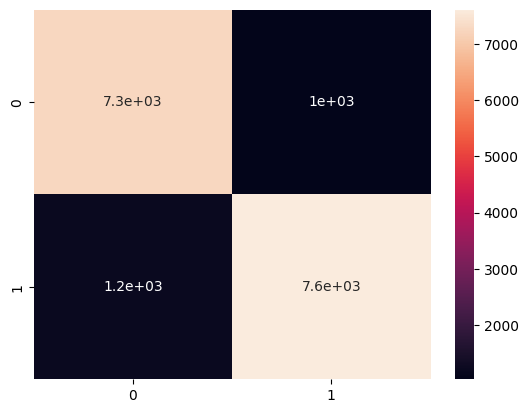

In [ ]:
LR = linear_model.LogisticRegression()
model = LR.fit(X_train, y_train)
lr_score = LR.score(X_test, y_test)
print('Linear regression processing')
print('Linear regression Score: %.2f %%' % lr_score)
print('classification report for the testing dataset - ')
lr_pred = model.predict(X_test)
print(classification_report(lr_pred,y_test))
print(sns.heatmap(confusion_matrix(lr_pred,y_test),annot = True))

In [ ]:
#With PCA
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=0.2)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.5, n_estimators=75, max_features='auto')

ADA BOOST

AdaBoostClassifier processing ...
AdaBoostClassifier Score:  0.9567479104564849
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8343
           1       0.96      0.95      0.96      8766

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109

Axes(0.125,0.11;0.62x0.77)


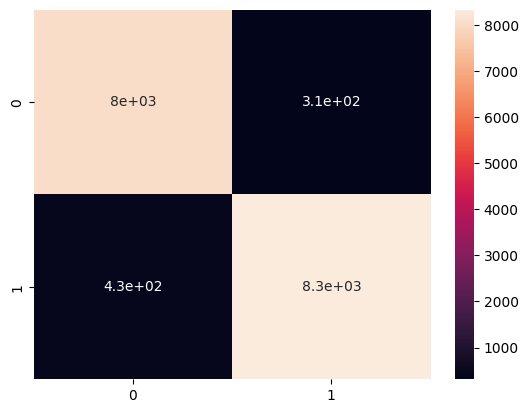

In [ ]:
model = AB.fit(X_train, y_train)
AB_feature = AB.feature_importances_
ab_score = AB.score(X_test, y_test)
print('AdaBoostClassifier processing ...')
print('AdaBoostClassifier Score: ' , ab_score)
AB_pred = model.predict(X_test)
print(classification_report(AB_pred,y_test))
print(sns.heatmap(confusion_matrix(AB_pred,y_test),annot = True))

RANDOM FOREST

RandomForestClassifier processing ...
RandomForestClassifier Score: %.3f% without cross validation 0.9620667484949442
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8494
           1       0.96      0.96      0.96      8615

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109

Axes(0.125,0.11;0.62x0.77)


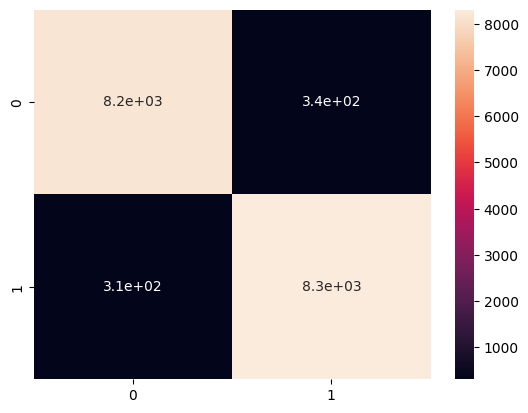

In [ ]:
model = RF.fit(X_train, y_train)
RF_feature = RF.feature_importances_
rf_score = RF.score(X_test, y_test)
print('RandomForestClassifier processing ...')
print('RandomForestClassifier Score: %.3f% without cross validation' , rf_score)
rf_pred = model.predict(X_test)
print(classification_report(rf_pred,y_test))
print(sns.heatmap(confusion_matrix(rf_pred,y_test),annot = True))

EXTRA TRESS CLASSIFIER

ExtraTreesClassifier processing ...
ExtraTreeClassifier: %.3f% 0.9617160558770238
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8494
           1       0.96      0.96      0.96      8615

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109

Axes(0.125,0.11;0.62x0.77)


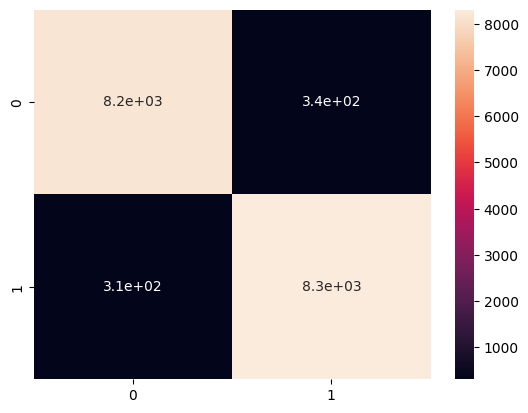

In [ ]:
model = ET.fit(X_train, y_train)
ET_feature = ET.feature_importances_

et_score = ET.score(X_test, y_test)
print('ExtraTreesClassifier processing ...')
print('ExtraTreeClassifier: %.3f%', et_score)
et_pred = model.predict(X_test)
print(classification_report(et_pred,y_test))
print(sns.heatmap(confusion_matrix(et_pred,y_test),annot = True))

GRADIENT BOOST CLASSIFER

ExtraTreesClassifier processing ...
ExtraTreeClassifier: %.3f% 0.9624174411128645
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8256
           1       0.97      0.95      0.96      8853

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109

Axes(0.125,0.11;0.62x0.77)


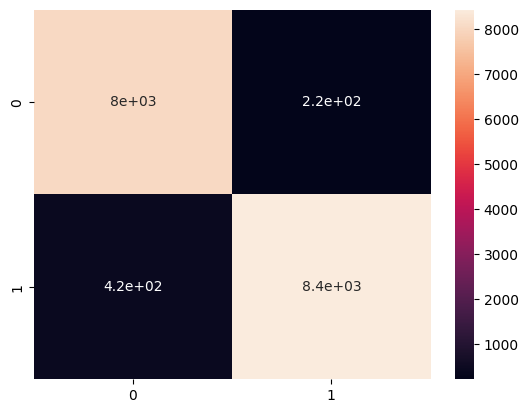

In [ ]:
model = GB.fit(X_train, y_train)
GB_feature = GB.feature_importances_

gb_score = GB.score(X_test, y_test)
print('ExtraTreesClassifier processing ...')
print('ExtraTreeClassifier: %.3f%', gb_score)
gb_pred = model.predict(X_test)
print(classification_report(gb_pred,y_test))
print(sns.heatmap(confusion_matrix(gb_pred,y_test),annot = True))

In [ ]:
feature_df = pd.DataFrame({'features': X_train.columns.values,'AdaBoost' : AB_feature,'RandomForest' : RF_feature,'ExtraTree' : ET_feature})
feature_df.head(5)

,features,AdaBoost,RandomForest,ExtraTree
0,0,-2.040460,0.152132,0.270706
1,1,-9.796474,0.078129,0.055278
2,2,0.161477,0.023467,0.011652
3,3,0.010733,0.032977,0.026501
4,4,0.008116,0.020727,0.018388


In [ ]:
n = 10
a_f = feature_df.nlargest(n, 'AdaBoost')
r_f = feature_df.nlargest(n, 'RandomForest')
e_f = feature_df.nlargest(n, 'ExtraTree')
result = pd.concat([a_f, e_f, r_f]).drop_duplicates()
len(result.index)

16

In [ ]:
selected_features = result['features'].values.tolist()
X_train_SF = X_train[selected_features]
X_test_SF = X_test[selected_features]
y = y_train[[18]].values.ravel()


In [ ]:
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=25, random_state=1)# .98
# clf3 = GradientBoostingClassifier(learning_rate=.001, n_estimators=200) # .99
ET = ExtraTreesClassifier(n_estimators=18, criterion='gini', max_features='auto', bootstrap=False) # .
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('et',ET)], voting='hard') # .('gnb', clf3)

for clf, label in zip([clf1, clf2,ET, eclf], ['DecisionTreeClassifier', 'Random Forest', 'ExtraTreesClassifier', 'Ensemble']):
    _ = clf.fit(X_train_SF, y_train)
    pred = clf.score(X_test_SF,y_test)
    print("Acc: %0.4f [%s]" % (pred,label))

Acc: 0.9572 [DecisionTreeClassifier]
Acc: 0.9629 [Random Forest]
Acc: 0.9623 [ExtraTreesClassifier]
Acc: 0.9636 [Ensemble]



Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      8463
           1       0.96      0.96      0.96      8646

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109



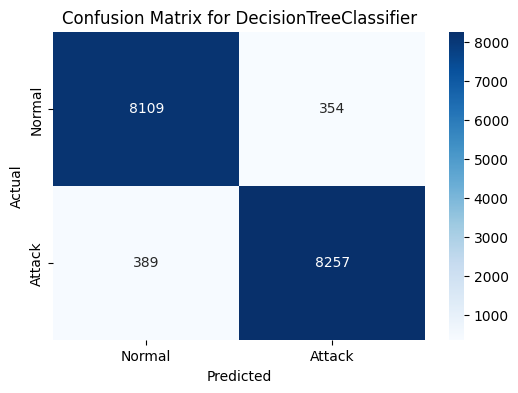


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8463
           1       0.96      0.97      0.96      8646

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109



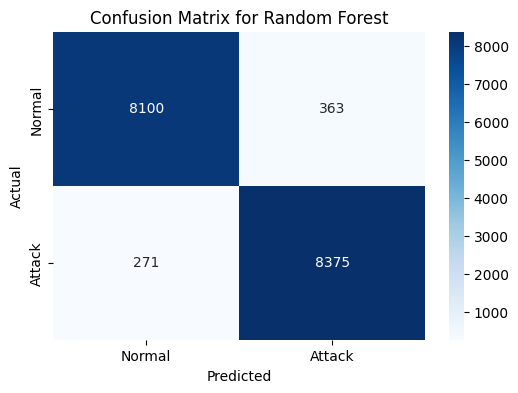


Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8463
           1       0.96      0.96      0.96      8646

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109



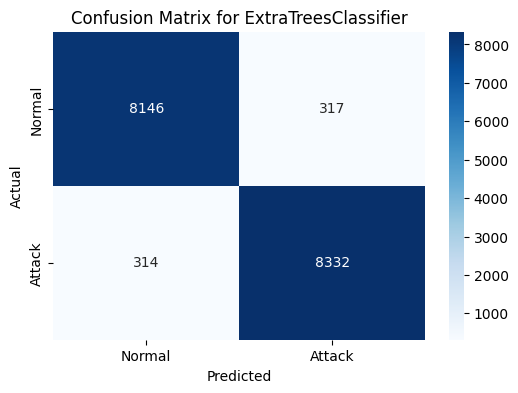


Classification Report for Ensemble:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8463
           1       0.96      0.97      0.96      8646

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109



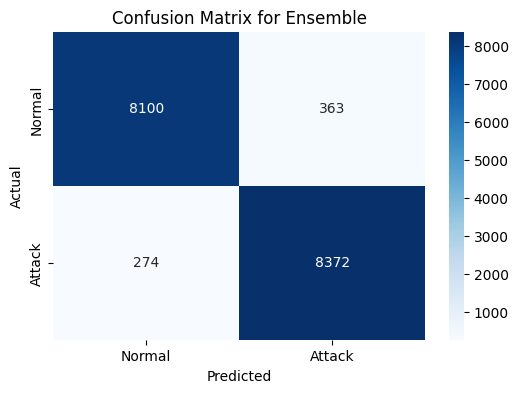

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize classifiers
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=25, random_state=1)
ET = ExtraTreesClassifier(n_estimators=18, criterion='gini', max_features='auto', bootstrap=False)
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('et', ET)], voting='hard')

# Train each classifier
for clf, label in zip([clf1, clf2, ET, eclf], ['DecisionTreeClassifier', 'Random Forest', 'ExtraTreesClassifier', 'Ensemble']):
    _ = clf.fit(X_train_SF, y_train)

    # Make predictions
    pred = clf.predict(X_test_SF)

    # Print classification report
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, pred))

    # Print confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
    plt.title(f'Confusion Matrix for {label}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


In [ ]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=25, random_state=1)# .98
ETC = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)

VOTING CLASSIFER

In [ ]:
eclf = VotingClassifier(estimators=[('DecisionTreeClassifier', DTC), ('RandomForestClassifier', RFC),('ExtraTreesClassifier',ETC)], voting='hard')
_ = eclf.fit(X_train, y)
pred = eclf.score(X_test,y_test)
print("Acc: %0.10f" % (pred))

Acc: 0.9639371091


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8463
           1       0.96      0.97      0.96      8646

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109



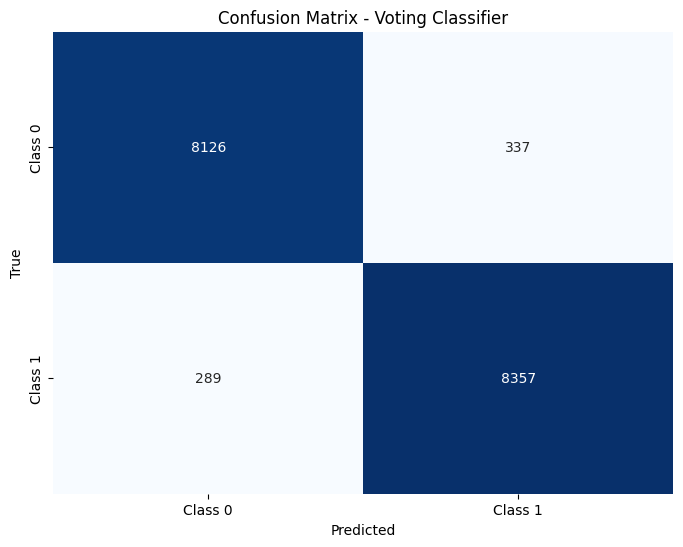

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'eclf' is your VotingClassifier model
eclf.fit(X_train, y_train)
y_pred = eclf.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Voting Classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


MODEL WITHOUT PCA

In [ ]:
data_no_pca = combined_data.drop(['hot',
 'is_host_login',
 'land',
 'num_compromised',
 'num_file_creations',
 'num_outbound_cmds',
 'num_root',
 'num_shells',
 'root_shell',
 'src_bytes',
 'su_attempted',
 'urgent'],axis = 1)

In [ ]:
X_no_pca = data_no_pca.drop('class',axis = 1)
y_no_pca = data_no_pca['class']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_no_pca,y_no_pca,test_size = 0.2,random_state = 17)

In [ ]:
LR = linear_model.LogisticRegression()
model = LR.fit(X_train, y_train)
lr_score = LR.score(X_test, y_test)
print('Linear regression processing')
print('Linear regression Score: %.2f %%' % lr_score)
print('classification report for the testing dataset - ')
lr_pred = model.predict(X_test)
print(classification_report(lr_pred,y_test))
print(sns.heatmap(confusion_matrix(lr_pred,y_test),annot = True))

In [ ]:
AB = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, learning_rate=0.2)
RF = RandomForestClassifier(n_estimators=10, criterion='entropy', max_features='auto', bootstrap=True)
ET = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)
GB = GradientBoostingClassifier(loss='deviance', learning_rate=0.5, n_estimators=75, max_features='auto')

ADA BOOST

In [ ]:
model = AB.fit(X_train, y_train)
AB_feature = AB.feature_importances_
ab_score = AB.score(X_test, y_test)
print('AdaBoostClassifier processing ...')
print('AdaBoostClassifier Score: ' , ab_score)
AB_pred = model.predict(X_test)
print(classification_report(AB_pred,y_test))
print(sns.heatmap(confusion_matrix(AB_pred,y_test),annot = True))

RANDOM FOREST

In [ ]:
model = RF.fit(X_train, y_train)
RF_feature = RF.feature_importances_
rf_score = RF.score(X_test, y_test)
print('RandomForestClassifier processing ...')
print('RandomForestClassifier Score: %.3f% without cross validation' , rf_score)
rf_pred = model.predict(X_test)
print(classification_report(rf_pred,y_test))
print(sns.heatmap(confusion_matrix(rf_pred,y_test),annot = True))


EXTRA TRESS

In [ ]:
model = ET.fit(X_train, y_train)
ET_feature = ET.feature_importances_

et_score = ET.score(X_test, y_test)
print('ExtraTreesClassifier processing ...')
print('ExtraTreeClassifier: %.3f%', et_score)
et_pred = model.predict(X_test)
print(classification_report(et_pred,y_test))
print(sns.heatmap(confusion_matrix(et_pred,y_test),annot = True))

GRADIENT BOOST

In [ ]:
model = GB.fit(X_train, y_train)
GB_feature = GB.feature_importances_

gb_score = GB.score(X_test, y_test)
print('ExtraTreesClassifier processing ...')
print('ExtraTreeClassifier: %.3f%', gb_score)
gb_pred = model.predict(X_test)
print(classification_report(gb_pred,y_test))
print(sns.heatmap(confusion_matrix(gb_pred,y_test),annot = True))

In [ ]:
feature_df = pd.DataFrame({'features': X_train.columns.values,'AdaBoost' : AB_feature,'RandomForest' : RF_feature,'ExtraTree' : ET_feature})
feature_df.head(5)

In [ ]:
n = 10
a_f = feature_df.nlargest(n, 'AdaBoost')
r_f = feature_df.nlargest(n, 'RandomForest')
e_f = feature_df.nlargest(n, 'ExtraTree')
result = pd.concat([a_f, e_f, r_f]).drop_duplicates()
len(result.index)

In [ ]:
selected_features = result['features'].values.tolist()
X_train_SF = X_train[selected_features]
X_test_SF = X_test[selected_features]
y = y_train[[18]].values.ravel()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.model_selection import train_test_split

# Assuming X_train_SF, y_train, X_test_SF, and y_test are already defined

# Model Initialization
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=25, random_state=1)
ET = ExtraTreesClassifier(n_estimators=18, criterion='gini', max_features='auto', bootstrap=False)
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2),('et', ET)], voting='hard')

# Define a list of classifiers and their labels
classifiers = [clf1, clf2, ET, eclf]
labels = ['DecisionTreeClassifier', 'Random Forest', 'ExtraTreesClassifier', 'Ensemble']

# Iterate through classifiers and print classification reports
for clf, label in zip(classifiers, labels):
    clf.fit(X_train_SF, y_train)
    y_pred = clf.predict(X_test_SF)

    # Print classification report
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred))



Classification Report for DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8463
           1       0.96      0.96      0.96      8646

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      8463
           1       0.96      0.97      0.96      8646

    accuracy                           0.96     17109
   macro avg       0.96      0.96      0.96     17109
weighted avg       0.96      0.96      0.96     17109


Classification Report for ExtraTreesClassifier:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      8463
           1       0.96      0.96      0.96      8646

    accuracy                           0

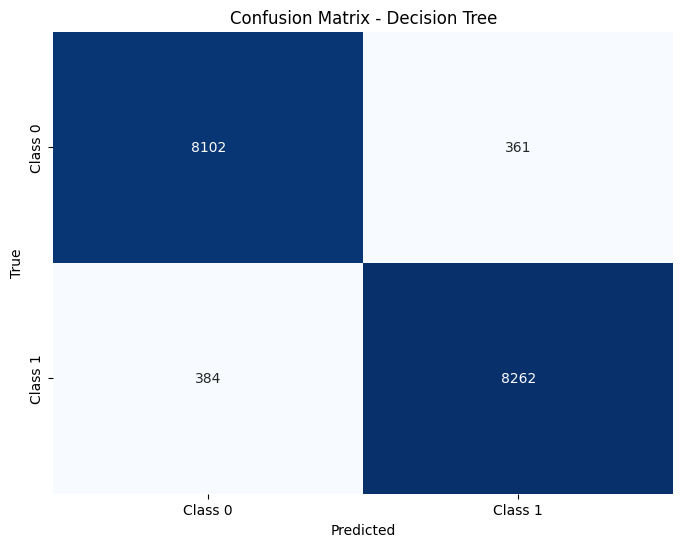

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'clf1' is your DecisionTreeClassifier model
clf1.fit(X_train_SF, y_train)
y_pred = clf1.predict(X_test_SF)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
DTC = DecisionTreeClassifier()
RFC = RandomForestClassifier(n_estimators=25, random_state=1)# .98
ETC = ExtraTreesClassifier(n_estimators=10, criterion='gini', max_features='auto', bootstrap=False)

VOTING CLASSIFER

In [ ]:
eclf = VotingClassifier(estimators=[('DecisionTreeClassifier', DTC), ('RandomForestClassifier', RFC),('ExtraTreesClassifier',ETC)], voting='hard')
_ = eclf.fit(X_train, y_train)
pred = eclf.score(X_test,y_test)
print("Acc: %0.10f" % (pred))

Acc: 0.9634110702
